<a href="https://colab.research.google.com/github/sefahw/AI-first-asignment/blob/master/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
class ScratchSVMClassifier():
    def _int_(self,num_iter=100,lr=0.01,kernel='linear',ganma=1,threshold=1e-5,verbose=False):
        self.iter=num_iter
        self.lr=lr
        self.kernel=kernel
        self.verbose=verbose
        self.ganma=ganma
        self.d=d
        self.theta=theta
    def _kernel(self,X1,X2):
        if self.kernel=='polly':
            self.ganma=1
            self.theta=1
            self.d=2
        return(self.ganma*np.dot(X1,X2.T)+self.theta)**self.d
    def _lamda_update(self,X,y):
        for i in range(len(X)):
            total=0
            for j in range(len(X)):
                total=self.lamda[j]*y[j]*self._kernel(X[i],X[j])
                self.lamda[i]+=self.lr*(1-total)
                if self.lamda[i]<0:
                    self.lamda[i]=0
    def fit(self,X,y,X_val=None,y_val=None):
        self.lamda=np.random.rand(len(X))
        self.ylabel=np.unique(y)
        y=np.where(y==self.ylabel[0],-1,1)
        for i in range(self.iter):
            self._lamda_update(X,y)
            if self.verbose:
                print('iter_n:',i,'lamda:',self.lamda)
        self.index_support_vectors=np.where(self.lamda>self.threshold)
        self.X_sv=X[self.lamda>self.threshold]
        self.n_support_vectors=len(self.X_sv)
        self.lam_sv=self.lamda[self.lamda>self.threshold]
        self.y_sv=y[self.lamda>self.threshold]
        
    def predict(self,X):
        y_pred=np.zeros(len(X))
        for i in range(len(X)):
            total=0
            for j in range(self.n_support_vector):
                total+=self.lam_sv[j]*self_kernel(X[i],self.X_sv[j])
                if total>=0:
                    y_pred[i]=self.ylabel[1]
                else:
                    y_pred[i]=self.ylabel[0]
        return_pred
        
            
         
        
    
                

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(seed=0)
n_samples=100
f0=[-1,2]
f1=[2,-1]
cov=([1.0,0.8],[0.8,1.0])
f0=np.random.multivariate_normal(f0,cov,int(n_samples/2))
f1=np.random.multivariate_normal(f1,cov,int(n_samples/2))
X=np.concatenate((f0,f1))
y=np.concatenate((np.ones((int(n_samples/2))),np.ones((int(n_samples/2))).astype(np.int)))
random_index=np.random.permutation(np.arange(n_samples))
sample1_X=X[random_index]
sample1_y=y[random_index]

<ipython-input-4-7a47ba3ee5fd>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y=np.concatenate((np.ones((int(n_samples/2))),np.ones((int(n_samples/2))).astype(np.int)))


In [5]:
X=sample1_X[20:40]
y=sample1_y[20:40]
print(X)
print(y)

[[ 2.55988095 -0.09906791]
 [-0.14205902  2.11124362]
 [-1.50642737  2.11125339]
 [-1.16513883  1.40174924]
 [-1.5615169   1.88535921]
 [-1.585383    0.94523063]
 [-1.00408384  2.76905831]
 [-2.46267867 -0.08076347]
 [-0.17950815  3.39022454]
 [ 0.63968522 -3.21271245]
 [-2.54738211  1.21306967]
 [-2.69336749 -0.61318911]
 [ 2.4982956   0.72754957]
 [ 1.91346848 -2.09976175]
 [ 1.00740032 -1.47176993]
 [ 3.43738711 -0.53961192]
 [ 3.14206286  0.31096066]
 [ 0.31731679  2.22551981]
 [ 2.7656298   0.19670802]
 [-0.55952028 -2.96217901]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
lamda=np.random.rand(len(X))
lamda.reshape(-1,1)
XX=np.array(([1,2],[1,2],[2,4],[2,4]))
np.dot(XX[1],XX.T)


array([ 5,  5, 10, 10])

In [7]:
num_iter=100
def _(self):
    for _ in range(num_iter):
        for i in range(len(X)):
            total=0
        for j in range(len(X)):
            total+=self.lamda[j]*y[i]*y[j]*np.dot(X[i]*X[j])
        lamda[i]+=0.01*(1-total)
        if lamda[i]<0:
           lamda[i]=0
    print('lamda:\n',lamda.reshape(-1,1))          

In [8]:
a=np.dot(X[0],X.T)
print(a)

[ 6.56280495 -0.57281068 -4.06543221 -3.12148507 -4.18407598 -4.15203376
 -2.84465992 -6.29616316 -0.79538197  1.95579473 -6.64117124 -6.83395278
  6.32326249  5.10627053  2.72463005  8.85276001  8.01250064  0.5918156
  7.06019559 -1.13884843]


In [9]:
b=lamda*y[0]*y
print(b)

[0.52459262 0.44201532 0.85263492 0.43343897 0.82687037 0.50934207
 0.08637698 0.66003986 0.20659461 0.84727532 0.68135913 0.17836735
 0.06985902 0.00968817 0.89204966 0.13346521 0.77919197 0.92516343
 0.71517875 0.49081861]


In [10]:
a*b

array([ 3.44279905, -0.25319109, -3.46632948, -1.35297329, -3.45968845,
       -2.11480545, -0.24571313, -4.15571866, -0.16432163,  1.65709661,
       -4.52502265, -1.21895404,  0.4417369 ,  0.04947042,  2.43050531,
        1.18153547,  6.24327619,  0.54752615,  5.04930185, -0.558968  ])

In [11]:
np.sum(a*b)

-0.472437925739839

In [12]:
np.dot(a,b)

-0.4724379257398408

In [13]:
c=np.dot(X,X.T)
print(c.shape)

(20, 20)


In [14]:
d=lamda*y*y.T
print(d.shape)

(20,)


In [15]:
np.dot(c,d)

array([ -0.47243793,   8.12142821,   8.1702798 ,   5.43049162,
         7.30383596,   3.69051268,  10.68113513,  -0.22237337,
        13.03961   , -12.37365666,   4.75459615,  -2.26094686,
         2.70756697,  -8.14066502,  -5.69403166,  -2.19743562,
         1.08302356,   8.54430966,   0.65726512, -11.36761514])

In [16]:
threshold=1e-5
spt_vec=X[lamda>threshold]
print(spt_vec)

[[ 2.55988095 -0.09906791]
 [-0.14205902  2.11124362]
 [-1.50642737  2.11125339]
 [-1.16513883  1.40174924]
 [-1.5615169   1.88535921]
 [-1.585383    0.94523063]
 [-1.00408384  2.76905831]
 [-2.46267867 -0.08076347]
 [-0.17950815  3.39022454]
 [ 0.63968522 -3.21271245]
 [-2.54738211  1.21306967]
 [-2.69336749 -0.61318911]
 [ 2.4982956   0.72754957]
 [ 1.91346848 -2.09976175]
 [ 1.00740032 -1.47176993]
 [ 3.43738711 -0.53961192]
 [ 3.14206286  0.31096066]
 [ 0.31731679  2.22551981]
 [ 2.7656298   0.19670802]
 [-0.55952028 -2.96217901]]


In [17]:
spt_index=np.where(lamda>threshold)
print(spt_index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]),)


In [18]:
spt_lamda=lamda[lamda>0]
spt_y=y[lamda>0]
print(spt_lamda)
print(spt_y)


[0.52459262 0.44201532 0.85263492 0.43343897 0.82687037 0.50934207
 0.08637698 0.66003986 0.20659461 0.84727532 0.68135913 0.17836735
 0.06985902 0.00968817 0.89204966 0.13346521 0.77919197 0.92516343
 0.71517875 0.49081861]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
X_test=X[0:5]
X_test

array([[ 2.55988095, -0.09906791],
       [-0.14205902,  2.11124362],
       [-1.50642737,  2.11125339],
       [-1.16513883,  1.40174924],
       [-1.5615169 ,  1.88535921]])

In [20]:
for i in range(len(X_test)):
    total=0
    for j in range (len(spt_vec)):
        total+=spt_lamda[j]*spt_y[j]*np.dot(X_test[i],spt_vec[j])
    if  total>0:
        print('f(X):{:.1f}.class:{}'.format(total,1))
    else:
        print('f(X):{:.1f}.class:{}'.format(total,-1))

f(X):-0.5.class:-1
f(X):8.1.class:1
f(X):8.2.class:1
f(X):5.4.class:1
f(X):7.3.class:1


In [21]:
np.random.seed(seed=0)
n_samples=100
f0=[-1,2]
f1=[2,-1]
cov=([1.0,0.8],[0.8,1.0])
f0=np.random.multivariate_normal(f0,cov,int(n_samples/2))
f1=np.random.multivariate_normal(f1,cov,int(n_samples/2))
X=np.concatenate((f0,f1))
y=np.concatenate((np.ones((int(n_samples/2))),np.ones((int(n_samples/2))).astype(np.int)))
random_index=np.random.permutation(np.arange(n_samples))
sample1_X=X[random_index]
sample1_y=y[random_index]


<ipython-input-21-7a47ba3ee5fd>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y=np.concatenate((np.ones((int(n_samples/2))),np.ones((int(n_samples/2))).astype(np.int)))


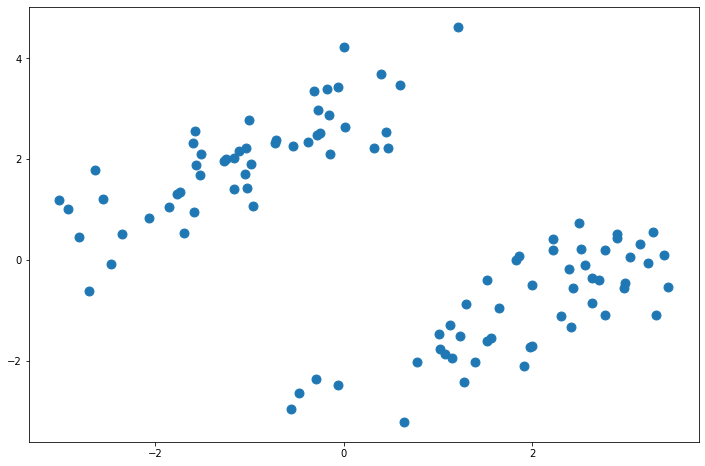

In [22]:
fig=plt.subplots(figsize=(12,8))
plt.rcParams["font.size"]=28
plt.scatter(sample1_X[:,0],sample1_X[:,1],s=80);

In [23]:
from sklearn.model_selection import train_test_split
sample1_X
sample1_y
X_train1,X_valid1, y_train1,y_valid1=\
train_test_split(X,y,train_size=0.8,random_state=None)

print('X_train.shape',X_train1.shape)
print(y_train1.shape)
print(X_valid1.shape)
print(y_valid1.shape)

X_train.shape (80, 2)
(80,)
(20, 2)
(20,)


In [28]:
clf1=ScratchSVMClassifier(num_iter=100,lr=0.01,)

clf1.fit(X_train1,y_train1)
y_pred1=clf1.predict(X_valid1)

TypeError: ignored

In [26]:
Show=False
if Show:
    print('pred:',y_pred1)
    print('vali:',y_valid1)

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import f1_score
accuracy=accuracy_score(y_valid1,y_pred1)
precision=precision_score(y_valid1,y_pred1)
recall=recall_score(y_valid1,y_pred1)
f1=f1_score(y_valid1,y_pred1)
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

NameError: ignored

In [29]:
from sklearn.svm import SVC

clf_sk=SVC()

clf_sk.fit(X_train1,y_train1)
y_pred_sk=clf_sk.predict(X_valid1)

ValueError: ignored